# readDiag - Radiância

O pacote `readDiag` foi concebido para ser uma ferramenta que possibilita o fácil acesso aos arquivos diagnósticos gerados pelo [Gridpoint Statistical Interpolation (GSI) system](https://github.com/NOAA-EMC/GSI). O pacote é composto principalmente por 2 classes, a primeira para ler os dados (`read_diag`) e outra para fazer diferentes tipos de figuras com dados selecionados (`plot_diag`). O detalhamento das ferramentas disponíveis nas classes`read_diag` e `plot_diag` encontra-se no notebook readDiag_tutorial_completo-pt_br. Neste notebook apresenta-se as ferramentas do `readDiag` construídas e modificadas (até o momento) para acesso aos arquivos de diagnóstico da **radiância** gerados pelo GSI. 

## A Classe `read_diag`

A classe read_diag não foi alterada. Abaixo as ferramentas desta classe são utilizadas como exemplo para visualização do diagnóstico de dados de **radiância**.


## A Classe `plot_diag`
    
Na classe plot_diag as funções abaixo foram construídas ou modificadas para leitura e análise dos dados de **radiância**:

1. `plot(self, varName, varType, param, minVal=None, maxVal=None, mask=None, area=None, **kwargs)`: a função `plot` gera uma figura para a variável `varName` (ex: `amsua`), `varType` (ex: `n19` (satélite)) e `param`, que pode ser várias opções como: `param="obs"` para o valor da observação, `param="omf"` para observação menos background ou `param="oma"` para observação menos análise. Foram inseridas as variáveis opicionais `minVal` e `maxVal` para fixar o range de cores do colormap. Também é possível mascarar os dados com as variáveis `iuse` e `idqc`, que indicam se o dado de **radiância** foi (`iuse>=1 & idqc=0`) assimilado ou rejeitado (`iuse>=1 & idqc!=0`), ou ainda, se o dado é monitorado (`iuse=-1`). Utilizando o `mask` ainda é possível especificar o canal `nchan` (nº do canal). Abaixo há um exemplo executado para `varName="amsua"`, `varType="n19"`, `param="obs"` e `mask="(nchan==14) & (iuse >= 1 & idqc == 0)"`;

<img src=notefigs/amsua_n19_obs_CH14_2024020100_plot_0.png style="width: 800px;">
<br>

2. `time_series_radi(self, varName=None, varType=None, mask=None, dateIni=None, dateFin=None, nHour="06", vminOMA=None, vmaxOMA=None, vminSTD=0.0, vmaxSTD=14.0, channel=None, Clean=None)`: a função `time_series_radi` gera figuras que mostram a variação temporal das médias e desvios padrões dos parâmetros OmF e OmA dos dados de **radiância**. Essa função pode ser utilizada considerando-se três situações: quando `channel` é o nº de um canal (4 Figuras são geradas utilizando apenas as observações do canal espeificado), quando `channel` é uma lista de canais (6 diagramas de *Hovmoller* são criados considerando apenas os canais listados) e quando `channel` é `None` (são gerados 6 diagramas de *Hovmoller* considerando todos os canais disponíveis (1 à 15)). 

A seguir são apresentados os parâmetros de entrada na função.
    
| Parâmetro       | Exemplo                                       | Descrição |
| :---            | :---:                                         | :--- |
| `self`          | `['/home/user/diag_amsua_n19_01.2024020100']` | Lista com todos os caminhos completos (`caminho/nome_do_arquivo`) de cada tempo da série temporal. |             
| `varName`       | `amsua`                                       | Nome da variável |   
| `varType`       | `n19`                                         | Tipo da variável |
| `dateIni`       | `2024020100`                                  | Data inicial da série temporal |
| `dateFin`       | `2024020218`                                  | Data final da série temporal |
| `nHour`         | `6`                                           | Intervalo de tempo em horas entre cada arquivo na lista `self` |
| `vminOMA`       | `-2.0`                                        | Valor mínimo da escala y (ordenada) para OmF e OmA |
| `vmaxOMA`       | `2.0`                                         | Valor máximo da escala y (ordenada) para OmF e OmA |
| `vminSTD`       | `0.0`                                         | Valor mínimo da escala y (ordenada) para o desvio-padrão |
| `vmaxSTD`       | `14.0`                                        | Valor máximo da escala y (ordenada) para o desvio-padrão |
| `channel`       | `14`                                          | Valor(es) do canal a ser feita a série temporal, opções: valor numérico referente ao canal, ex.: `14` para plotar um canal; `[6, 9, 10, 13, 14]` para plotar uma lista de canais específica; `None` para plotar todos os canais. |
| `Clean`         | `True` ou `False`                             | Se `True`, após gerar e salvar a figura, a janela da figura é reiniciada (`plt.clf()`) ou fechada (`plt.close()`), se `False`, este procedimento é eliminado e a figura continua disponível para visualização com `plt.show()`. |

3. `statcount(self, varName=None, varType=None, noiqc=False, dateIni=None, dateFin=None, nHour="06", channel=None, figTS=False, figMap=False, **kwargs)`: a função `statcount` gera dois tipos de figuras. Se `figTS` é `True` uma figura com a série temporal da quantidade de dados assimilados, rejeitados e monitorados é gerada. Se `figMap` é `True` uma sequência temporal de figuras indicando no mapa a geolocalização das observações assimiladas, rejeitadas e monitoradas são produzidas. Nesta função, quando os dados são de **radiância**, a variável `channel` recebe o número específico de um canal e quando se trata de dados convencionais a variável `channel` deve ser `None`. Quando `channel = nº canal` os dados monitorados (`iuse=-1`) são subclassificados em dois grupos: observações monitoradas que seriam assimiladas (monitorado-assimilado) pois, `idqc=0` e observações monitoradas que seriam rejeitadas (monitorado-rejeitado) pois, `idqc!=0`. Logo, para os dados de **radiância**, se `figMap=True` podem ser geradas duas figuras, uma com a geolocalização das observações assimiladas e rejeitadas e outra com a geolocalização das observações monitoradas-assimiladas e monitoradas-rejeitadas. A variável `noiqc` é um parâmetro da lista de nomes do GSI sendo utilizada na classificação dos dados convencionais e pode receber os valores `True` ou `False` (não interfere na classificação da **radiância**). Abaixo há um exemplo executado para `varName="amsua"`, `varType="n19"`, `noiqc=False`, `dateIni="2024020100"`, `dateFin="2024020218"`, `nHour="06"`, `channel=6`, `figTS=True`, `figMap=True`.


`figMap=True`
<br>
| <img src=notefigs/Assim-Rejei_amsua-n19_CH6_2024020100.png style="width: 400px;"> | <img src=notefigs/Assim-Rejei_amsua-n19_CH6_2024020106.png style="width: 400px;"> |
|-|-|
|<img src=notefigs/Assim-Rejei_amsua-n19_CH6_2024020112.png style="width: 400px;"> | <img src=notefigs/Assim-Rejei_amsua-n19_CH6_2024020118.png style="width: 400px;"> |
| <img src=notefigs/Assim-Rejei_amsua-n19_CH6_2024020200.png style="width: 400px;"> | <img src=notefigs/Assim-Rejei_amsua-n19_CH6_2024020206.png style="width: 400px;"> |
|<img src=notefigs/Assim-Rejei_amsua-n19_CH6_2024020212.png style="width: 400px;"> | <img src=notefigs/Assim-Rejei_amsua-n19_CH6_2024020218.png style="width: 400px;"> |
<br>

`figTS=True`
<br>
<img src=notefigs/time_series_amsua-n19_CH6__TotalObs.png style="width: 400px;">
<br> 

No decorrer deste notebook são mostrados exemplos com recortes de código para exemplificar o uso das funções acima elencadas.

## Utilização da classe `read_diag`

### Bibliotecas necessárias

Para iniciar a utilização do `readDiag`, carregue primeiro as bibliotecas necessárias para a sua utilização:

* `gsidiag`: é a biblioteca que contém as classes `read_diag` e `plot_diag`;
* `pandas`: é a biblioteca que fornece as estruturas de dados tabulados utilizadas pelo `readDiag`;
* `matplotlib`: é a biblioteca a partir da qual são confeccionadas as figuras;
* `datetime`: é a biblioteca utilizada para manipular datas;
* `datasources`: é a biblioteca utilizada para analisar e armazenar informações de um arquivo contendo dados de observações;
* `os`: é a biblioteca que fornece diversas interfaces do sistema operacional.


A instrução `%matplotlib inline` é um comando mágico do Jupyter e apenas ajusta o ambiente para que não seja necessário utilizar o comando `plt.show()` sempre que figuras forem mostradas dentro do notebook. Se você estiver utilizando o `readDiag` dentro de um script Python, esta diretiva pode ser suprimida e o comando `plt.show()` deve ser utilizado, a depender da situação.

In [ ]:
# Descomente a linha a seguir para utilizar este notebook no Google Colab
#!pip install readDiag

In [1]:
import gsidiag as gd

import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from gsidiag.datasources import getVarInfo

import os

%matplotlib inline

### Variáveis principais

Na tabela a seguir, estão relacionadas os valores padrão das variáveis utilizadas ao longo deste tutorial. Observe que as variáveis possuem diferentes tipos e que algumas podem ser declaradas como `None`.

| Variáveis |     | Valores          | Tipo              |
| :---:     |:---:| :---             | :---              |
| `DIRdiag` | =   | `/pesq/share/das/dist/joao.gerd/EXP18/GSI/dataout` | string |
|`varName`  | =   | `amsua`          | string            |  
|`varType`  | =   | `n19`            | <span style="color:red">**string**</span> |        
|`dateIni`  | =   | `2024021000`     | string            |
|`dateFin`  | =   | `2024021018`     | string            |
|`nHour`    | =   | `6`              | string            | 
|`vminOMA`  | =   | `-2.0`           | float             |
|`vmaxOMA`  | =   | `2.0`            | float             |
|`vminSTD`  | =   | `0.0`            | float             |
|`vmaxSTD`  | =   | `14.0`           | float             |
|`channel`  | =   | `6`              | integer ou `None` |
                          
Dessa forma, na célula a seguir são ajustadas as variáveis seguindo os valores da tabela acima. Além disso, são ajustados também os valores das datas para compor o caminho e os nomes dos arquivos de diagnóstico do GSI:

In [2]:
#Endereço onde os dados devem estar disponiveis para os testes 
#Para uso na Egeon
#DIRdiag = "/pesq/share/das/dist/joao.gerd/EXP18/GSI/dataout"

# Para uso na Itapemirim (Colorado, Ilopolis e outras máquinas virtuais)
#DIRdiag = "/share/das/dist/joao.gerd/EXP18/GSI/dataout"

# Para uso em máquina local (neste caso, o diretório remoto deverá ser montado localmente com o comando sshfs)
# Exemplo: 
# $ sshfs username@egeon.cptec.inpe.br:/pesq/share/das/dist/joao.gerd/EXP18/GSI/dataout /extra2/EGEON_EXP18_GSI_dataout
# ou
# $ sshfs username@itapemirim.cptec.inpe.br:/share/das/dist/joao.gerd/EXP18/GSI/dataout /extra2/EGEON_EXP18_GSI_dataout
# DIRdiag = '/extra2/EGEON_EXP18_GSI_dataout'

# Para maquinas fora do cptec é preciso fazer o download dos dados fora python, para isso pode ser feito os seguintes comandos

#    cd ~/readDiag/data
#  EXP19: Para executar os dois dias são necessários pelo menos 2GB de memória RAM
#    wget -c -r https://ftp1.cptec.inpe.br/pesquisa/das/testecase/SMNAexp19_amsua.tar.gz
#    tar -xzvf   ftp1.cptec.inpe.br/pesquisa/das/testecase/SMNAexp19_amsua.tar.gz
#    rm -rf ftp1.cptec.inpe.br
# !wget -P ../data -c -r https://dataserver.cptec.inpe.br/dataserver_dimnt/das/testecase/SMNAexp19_amsua.tar.gz
# !wget -P ../data -c -r https://dataserver.cptec.inpe.br/dataserver_dimnt/das/testecase/SMNAexp19_conv_0201.tar.gz
# !wget -P ../data -c -r https://dataserver.cptec.inpe.br/dataserver_dimnt/das/testecase/SMNAexp19_conv_0202.tar.gz

# !tar -zxvf ../data/dataserver.cptec.inpe.br/dataserver_dimnt/das/testecase/SMNAexp19_amsua.tar.gz -C ../data/dataserver.cptec.inpe.br/dataserver_dimnt/das/testecase/
# !tar -zxvf ../data/dataserver.cptec.inpe.br/dataserver_dimnt/das/testecase/SMNAexp19_conv_0201.tar.gz -C ../data/dataserver.cptec.inpe.br/dataserver_dimnt/das/testecase/
# !tar -zxvf ../data/dataserver.cptec.inpe.br/dataserver_dimnt/das/testecase/SMNAexp19_conv_0202.tar.gz -C ../data/dataserver.cptec.inpe.br/dataserver_dimnt/das/testecase/

# To obtain the ${USER} from the operating system, the os.environ.get('USER') function from the os library is used.
# DIRdiag = os.path.join(os.getcwd(), '../data/dataserver.cptec.inpe.br/dataserver_dimnt/das/testecase/SMNAexp19/GSI/dataout')
# DIRdiag = os.path.join(os.getcwd(), '../../readDiag/data/SMNAexp19/GSI/dataout')
#-------------- sensor Hirs/4: arquivos de diagnóstico apenas no EXP21 satélite n19 ----------------# 
DIRdiag = os.path.join(os.getcwd(), '../../Exp_SMNA/data/EXP21/gsi_dataout')

varName = 'hirs4'
varType = 'n19'
dateIni = '2024030100' 
dateFin = '2024030218'
nHour = '6'          
vminOMA = -2.0       
vmaxOMA = 2.0        
vminSTD = 0.0        
vmaxSTD = 14.0       
channel = 6

datei = datetime.strptime(str(dateIni), '%Y%m%d%H')
datef = datetime.strptime(str(dateFin), '%Y%m%d%H')
dates = [dates.strftime('%Y%m%d%H') for dates in pd.date_range(datei, datef,freq='6H').tolist()]

print(dates)

['2024030100', '2024030106', '2024030112', '2024030118', '2024030200', '2024030206', '2024030212', '2024030218']


Gerando as variáveis `path` e `pathc` onde estarão os caminhos completos (incluindo nome do arquivo) dos arquivos diagnósticos do primeiro (OmF) e último (OmA) outer loop dos dados de **radiância**:

In [3]:
# Adaptado para criar os caminhos para arquivos de radiância!
paths, pathsc = [], []

OuterL = '01'        
[paths.append(DIRdiag + '/' + dt + '/diag_' + varName +'_'+ varType +'_' + OuterL + '.' + dt) for dt in dates]
    
OuterLc = '03'
[pathsc.append(DIRdiag + '/' + dt + '/diag_' + varName +'_'+ varType +'_' + OuterLc + '.' + dt) for dt in dates]

print(paths)
print('')
print(pathsc)

['/home/radiancia/DiagRadi-V2_issue45/notebooks/../../Exp_SMNA/data/EXP21/gsi_dataout/2024030100/diag_hirs4_n19_01.2024030100', '/home/radiancia/DiagRadi-V2_issue45/notebooks/../../Exp_SMNA/data/EXP21/gsi_dataout/2024030106/diag_hirs4_n19_01.2024030106', '/home/radiancia/DiagRadi-V2_issue45/notebooks/../../Exp_SMNA/data/EXP21/gsi_dataout/2024030112/diag_hirs4_n19_01.2024030112', '/home/radiancia/DiagRadi-V2_issue45/notebooks/../../Exp_SMNA/data/EXP21/gsi_dataout/2024030118/diag_hirs4_n19_01.2024030118', '/home/radiancia/DiagRadi-V2_issue45/notebooks/../../Exp_SMNA/data/EXP21/gsi_dataout/2024030200/diag_hirs4_n19_01.2024030200', '/home/radiancia/DiagRadi-V2_issue45/notebooks/../../Exp_SMNA/data/EXP21/gsi_dataout/2024030206/diag_hirs4_n19_01.2024030206', '/home/radiancia/DiagRadi-V2_issue45/notebooks/../../Exp_SMNA/data/EXP21/gsi_dataout/2024030212/diag_hirs4_n19_01.2024030212', '/home/radiancia/DiagRadi-V2_issue45/notebooks/../../Exp_SMNA/data/EXP21/gsi_dataout/2024030218/diag_hirs4_n19

### Leitura dos arquivos de diagnósticos

Lendo os arquivos diagnósticos de **radiância** com a função `read_diag()` do pacote `readDiag`. No trecho de código a seguir, observe que a função `read_diag()` é utilizada dentro de um loop que varia sobre todos os arquivos das listas `paths` e `pathsc` definidas no passo anterior. No final do loop, é gerada a lista `gdf_list` que conterá todos os arquivos lidos pelo `readDiag`:

In [4]:
read = True

if read:        
    gdf_list = []
    print('')
    
    print('Aguarde, o tempo total estimado para a leitura dos arquivos é de ' +
          str(int((float(len(paths))*20)/60)) + ' minutos e ' +
          str(int((float(len(paths))*20)%60)) + ' segundos.')
    
    print('')
    
    for path, pathc in zip(paths, pathsc):
        print('Reading ' + path)
        
        gdf = gd.read_diag(path, pathc)
        
        gdf_list.append(gdf)
        
    print('Pronto!')    


Aguarde, o tempo total estimado para a leitura dos arquivos é de 2 minutos e 40 segundos.

Reading /home/radiancia/DiagRadi-V2_issue45/notebooks/../../Exp_SMNA/data/EXP21/gsi_dataout/2024030100/diag_hirs4_n19_01.2024030100
 
>>> GSI DIAG <<<
 
Reading /home/radiancia/DiagRadi-V2_issue45/notebooks/../../Exp_SMNA/data/EXP21/gsi_dataout/2024030106/diag_hirs4_n19_01.2024030106
 
>>> GSI DIAG <<<
 
Reading /home/radiancia/DiagRadi-V2_issue45/notebooks/../../Exp_SMNA/data/EXP21/gsi_dataout/2024030112/diag_hirs4_n19_01.2024030112
 
>>> GSI DIAG <<<
 
Reading /home/radiancia/DiagRadi-V2_issue45/notebooks/../../Exp_SMNA/data/EXP21/gsi_dataout/2024030118/diag_hirs4_n19_01.2024030118
 
>>> GSI DIAG <<<
 
Reading /home/radiancia/DiagRadi-V2_issue45/notebooks/../../Exp_SMNA/data/EXP21/gsi_dataout/2024030200/diag_hirs4_n19_01.2024030200
 
>>> GSI DIAG <<<
 
Reading /home/radiancia/DiagRadi-V2_issue45/notebooks/../../Exp_SMNA/data/EXP21/gsi_dataout/2024030206/diag_hirs4_n19_01.2024030206
 
>>> GSI D

A variável `gdf_list` é uma lista de dataframes contendo os dados de cada arquivo diagnóstico. Para trabalhar com um único tempo basta informar a lista com o índice fixo, por exemplo: `gdf_list[0]`:

In [5]:
gdf_list

Fazendo `tidx = 0`, obtemos o primeiro objeto da lista `gdf_list`:

In [6]:
tidx = 0
gdf_list[tidx]

### Obtendo informações dos arquivos

Utilize a função `pfileinfo()` para obter informação como o tipo de sensor e seu respectivo satélite (`n19`) que estão contidos dentro do arquivo:

In [7]:
gdf_list[tidx].pfileinfo()

Variable Name : hirs4
              └── kx => n19  



Além do método `pfileinfo()`, outros métodos e funções também podem ser utilizados para acessar as informações sobre os arquivos abertos. Para obter uma lista dos métodos e funções disponíveis, digite `gdf_list[tidx].` e pressione a tecla `<TAB>` duas vezes no teclado:

```python
>>> gdf_list[tidx].
gdf_list[tidx].close(      gdf_list[tidx].obsInfo     gdf_list[tidx].pfileinfo(  gdf_list[tidx].zlevs       
gdf_list[tidx].tocsv(      gdf_list[tidx].overview(   gdf_list[tidx].varNames    
gdf_list[tidx].obs
```

Os métodos e funções embutidas possuem documentação, as quais podem ser acessadas da seguinte forma:

```python
print(object.function_name.__doc__)
```

ou

```python
help(object.function_name)
```

Por exemplo:

In [8]:
print(gdf_list[tidx].pfileinfo.__doc__)


        Prints a fancy list of the existing variables and types.

        Usage: pfileinfo()
        


ou ainda:

In [9]:
help(gdf_list[tidx].pfileinfo)

Help on method pfileinfo in module gsidiag.__main__:

pfileinfo() method of gsidiag.__main__.read_diag instance
    Prints a fancy list of the existing variables and types.
    
    Usage: pfileinfo()



Para obter um dicionário com todas as informações sobre as variáveis e tipos contidos no arquivo, utilize o método `obsInfo`:

In [10]:
gdf_list[tidx].obsInfo

{'hirs4':                     lat        lon         elev  nchan      time  iuse  \
 SatId points                                                             
 n19   0      -87.533897   12.51780  2687.356445    1.0  1.998333  -1.0   
       1      -87.533897   12.51780  2687.356445    2.0  1.998333  -1.0   
       2      -87.533897   12.51780  2687.356445    3.0  1.998333  -1.0   
       3      -87.533897   12.51780  2687.356445    4.0  1.998333  -1.0   
       4      -87.533897   12.51780  2687.356445    5.0  1.998333  -1.0   
 ...                 ...        ...          ...    ...       ...   ...   
       177265  79.903900  337.40271   432.984558   15.0 -2.297500  -1.0   
       177266  79.903900  337.40271   432.984558   16.0 -2.297500  -1.0   
       177267  79.903900  337.40271   432.984558   17.0 -2.297500  -1.0   
       177268  79.903900  337.40271   432.984558   18.0 -2.297500  -1.0   
       177269  79.903900  337.40271   432.984558   19.0 -2.297500  -1.0   
 
              

Para acessar uma variável específica (ex: `amsua`), faça:

In [11]:
print('Variável: ', varName)

gdf_list[tidx].obsInfo[varName]

Variável:  hirs4


lat        lon         elev  nchan      time  iuse  \
SatId points                                                             
n19   0      -87.533897   12.51780  2687.356445    1.0  1.998333  -1.0   
      1      -87.533897   12.51780  2687.356445    2.0  1.998333  -1.0   
      2      -87.533897   12.51780  2687.356445    3.0  1.998333  -1.0   
      3      -87.533897   12.51780  2687.356445    4.0  1.998333  -1.0   
      4      -87.533897   12.51780  2687.356445    5.0  1.998333  -1.0   
...                 ...        ...          ...    ...       ...   ...   
      177265  79.903900  337.40271   432.984558   15.0 -2.297500  -1.0   
      177266  79.903900  337.40271   432.984558   16.0 -2.297500  -1.0   
      177267  79.903900  337.40271   432.984558   17.0 -2.297500  -1.0   
      177268  79.903900  337.40271   432.984558   18.0 -2.297500  -1.0   
      177269  79.903900  337.40271   432.984558   19.0 -2.297500  -1.0   

                    idqc        inverr           oer           obs  \
SatId points                                                         
n19   0        -0.000000  3.889622e-01  2.571136e+00  2.402800e+02   
      1         0.000000  1.915349e+00  5.691713e-01  1.000000e+10   
      2         1.382925  1.382925e+00  7.758714e-01  0.000000e+00   
      3         0.600656  2.278000e+02  4.389815e-03  0.000000e+00   
      4       229.119995  1.000000e+10  1.000000e-10 -6.754424e-01   
...                  ...           ...           ...           ...   
      177265    0.000000  2.300182e+00  4.323125e-01  0.000000e+00   
      177266    1.956890  3.829417e+00  2.664327e-01  1.000000e+00   
      177267    2.137933  0.000000e+00           NaN  6.964686e-03   
      177268    0.000000  0.000000e+00           NaN  1.573258e+00   
      177269    0.000000  1.000000e+00  1.000000e+00  9.849000e-01   

                       omf      omf_nobc     emiss           oma  \
SatId points                                                       
n19   0       2.052728e+00  2.052728e+00  0.979492  1.646171e+00   
      1       2.318000e+02  1.915349e+00 -3.000000  2.318000e+02   
      2       1.000000e+10  2.303800e+02  1.879993  1.000000e+10   
      3       0.000000e+00  1.000000e+10  0.600656  0.000000e+00   
      4       0.000000e+00  0.000000e+00  1.509936  0.000000e+00   
...                    ...           ...       ...           ...   
      177265  0.000000e+00  5.290838e+00  0.000000  0.000000e+00   
      177266  0.000000e+00  0.000000e+00  0.000000  0.000000e+00   
      177267  1.000000e+00  0.000000e+00  1.462167  1.000000e+00   
      177268  4.794928e-01  1.000000e+00  2.475141  4.900599e-01   
      177269  2.841364e-01  8.844997e-01  0.000000  2.897180e-01   

                  oma_nobc       imp       dfs                    geometry  
SatId points                                                                
n19   0       1.646171e+00 -0.584883 -0.324585  POINT (12.51781 -87.53390)  
      1       1.756940e+00  0.000000  0.000000  POINT (12.51781 -87.53390)  
      2       2.303800e+02  0.000000  0.000000  POINT (12.51781 -87.53390)  
      3       1.000000e+10  0.000000  0.000000  POINT (12.51781 -87.53390)  
      4       0.000000e+00  0.000000  0.000000  POINT (12.51781 -87.53390)  
...                    ...       ...       ...                         ...  
      177265  5.350623e+00  0.000000  0.000000  POINT (-22.59729 79.90390)  
      177266  0.000000e+00  0.000000  0.000000  POINT (-22.59729 79.90390)  
      177267  0.000000e+00       NaN       NaN  POINT (-22.59729 79.90390)  
      177268  1.000000e+00       NaN       NaN  POINT (-22.59729 79.90390)  
      177269  8.886733e-01  0.003203  0.001586  POINT (-22.59729 79.90390)  

[177270 rows x 18 columns]

Para acessar variável e tipo específicos (ex: `amsua` do tipo `n19`), faça:

In [12]:
print('Variável: ', varName, ' e Tipo: ', varType)

gdf_list[tidx].obsInfo[varName].loc[varType]

Variável:  hirs4  e Tipo:  n19


lat        lon         elev  nchan      time  iuse        idqc  \
points                                                                         
0      -87.533897   12.51780  2687.356445    1.0  1.998333  -1.0   -0.000000   
1      -87.533897   12.51780  2687.356445    2.0  1.998333  -1.0    0.000000   
2      -87.533897   12.51780  2687.356445    3.0  1.998333  -1.0    1.382925   
3      -87.533897   12.51780  2687.356445    4.0  1.998333  -1.0    0.600656   
4      -87.533897   12.51780  2687.356445    5.0  1.998333  -1.0  229.119995   
...           ...        ...          ...    ...       ...   ...         ...   
177265  79.903900  337.40271   432.984558   15.0 -2.297500  -1.0    0.000000   
177266  79.903900  337.40271   432.984558   16.0 -2.297500  -1.0    1.956890   
177267  79.903900  337.40271   432.984558   17.0 -2.297500  -1.0    2.137933   
177268  79.903900  337.40271   432.984558   18.0 -2.297500  -1.0    0.000000   
177269  79.903900  337.40271   432.984558   19.0 -2.297500  -1.0    0.000000   

              inverr           oer           obs           omf      omf_nobc  \
points                                                                         
0       3.889622e-01  2.571136e+00  2.402800e+02  2.052728e+00  2.052728e+00   
1       1.915349e+00  5.691713e-01  1.000000e+10  2.318000e+02  1.915349e+00   
2       1.382925e+00  7.758714e-01  0.000000e+00  1.000000e+10  2.303800e+02   
3       2.278000e+02  4.389815e-03  0.000000e+00  0.000000e+00  1.000000e+10   
4       1.000000e+10  1.000000e-10 -6.754424e-01  0.000000e+00  0.000000e+00   
...              ...           ...           ...           ...           ...   
177265  2.300182e+00  4.323125e-01  0.000000e+00  0.000000e+00  5.290838e+00   
177266  3.829417e+00  2.664327e-01  1.000000e+00  0.000000e+00  0.000000e+00   
177267  0.000000e+00           NaN  6.964686e-03  1.000000e+00  0.000000e+00   
177268  0.000000e+00           NaN  1.573258e+00  4.794928e-01  1.000000e+00   
177269  1.000000e+00  1.000000e+00  9.849000e-01  2.841364e-01  8.844997e-01   

           emiss           oma      oma_nobc       imp       dfs  \
points                                                             
0       0.979492  1.646171e+00  1.646171e+00 -0.584883 -0.324585   
1      -3.000000  2.318000e+02  1.756940e+00  0.000000  0.000000   
2       1.879993  1.000000e+10  2.303800e+02  0.000000  0.000000   
3       0.600656  0.000000e+00  1.000000e+10  0.000000  0.000000   
4       1.509936  0.000000e+00  0.000000e+00  0.000000  0.000000   
...          ...           ...           ...       ...       ...   
177265  0.000000  0.000000e+00  5.350623e+00  0.000000  0.000000   
177266  0.000000  0.000000e+00  0.000000e+00  0.000000  0.000000   
177267  1.462167  1.000000e+00  0.000000e+00       NaN       NaN   
177268  2.475141  4.900599e-01  1.000000e+00       NaN       NaN   
177269  0.000000  2.897180e-01  8.886733e-01  0.003203  0.001586   

                          geometry  
points                              
0       POINT (12.51781 -87.53390)  
1       POINT (12.51781 -87.53390)  
2       POINT (12.51781 -87.53390)  
3       POINT (12.51781 -87.53390)  
4       POINT (12.51781 -87.53390)  
...                            ...  
177265  POINT (-22.59729 79.90390)  
177266  POINT (-22.59729 79.90390)  
177267  POINT (-22.59729 79.90390)  
177268  POINT (-22.59729 79.90390)  
177269  POINT (-22.59729 79.90390)  

[177270 rows x 18 columns]

Para acessar o valor da observação, utilize o método `obs`:

In [13]:
print('Variável: ', varName, ' e Tipo: ', varType)

gdf_list[tidx].obsInfo[varName].loc[varType].obs

Variável:  hirs4  e Tipo:  n19


points
0         2.402800e+02
1         1.000000e+10
2         0.000000e+00
3         0.000000e+00
4        -6.754424e-01
              ...     
177265    0.000000e+00
177266    1.000000e+00
177267    6.964686e-03
177268    1.573258e+00
177269    9.849000e-01
Name: obs, Length: 177270, dtype: float32

Para acessar o valor do controle de qualidade da observação em um canal específico, utilize o método idqc com a instrução `mask` na função query:

In [14]:
mask = 'nchan == 2'
gdf_list[tidx].obsInfo[varName].query(mask).loc[varType].idqc

points
1         0.000000
20        1.659460
39        1.659688
58        1.659984
77        1.660089
            ...   
177176    0.000000
177195    1.659294
177214    1.659077
177233    1.659184
177252    1.659047
Name: idqc, Length: 9330, dtype: float32

## Utilização da classe `plot_diag`

### Distribuição espacial

A utilização das funções da classe `plot_diag` que foram alteradas/construídas para diagnóstico de dados de **radiância** é apresentada abaixo, junto com os comandos para gerar diversos tipos de figuras.

Gerando uma figura com os valores das observações (`param='obs'`) para a variável e tipo selecionados:

/home/radiancia/DiagRadi-V2_issue45/gsidiag/__main__.py:94: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  path=gpd.datasets.get_path('naturalearth_lowres')


<Axes: xlabel='Longitude', ylabel='Latitude'>

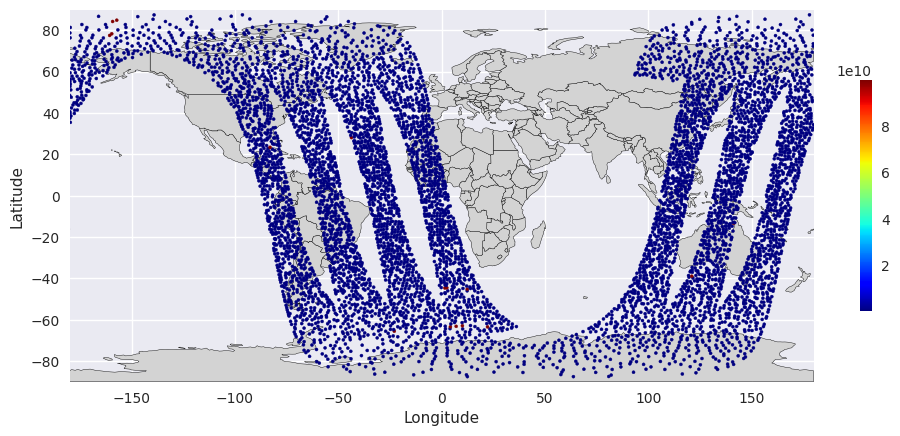

In [15]:
param = 'obs'
channel = 1

# EXP21 todos os canais do sensor Hirs4 estão com iuse==-1
gd.plot_diag.plot(gdf_list[tidx], 
                  varName=varName, 
                  varType=varType, 
                  param=param,  
                  mask="(nchan=="+str(channel)+") & (iuse == -1 & idqc == 0)", 
                  markersize=4.80, 
                  legend='true')

Abaixo, um exemplo alterando a escala de cores do colormap (`minVal` e `maxVal`), inserido informações sobre canal, data, sensor e satélite (aqui utiliza a função getVarInfo da biblioteca datasources) e salvando a figura com o nome proposto em `figname`:

/home/radiancia/DiagRadi-V2_issue45/gsidiag/__main__.py:94: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  path=gpd.datasets.get_path('naturalearth_lowres')


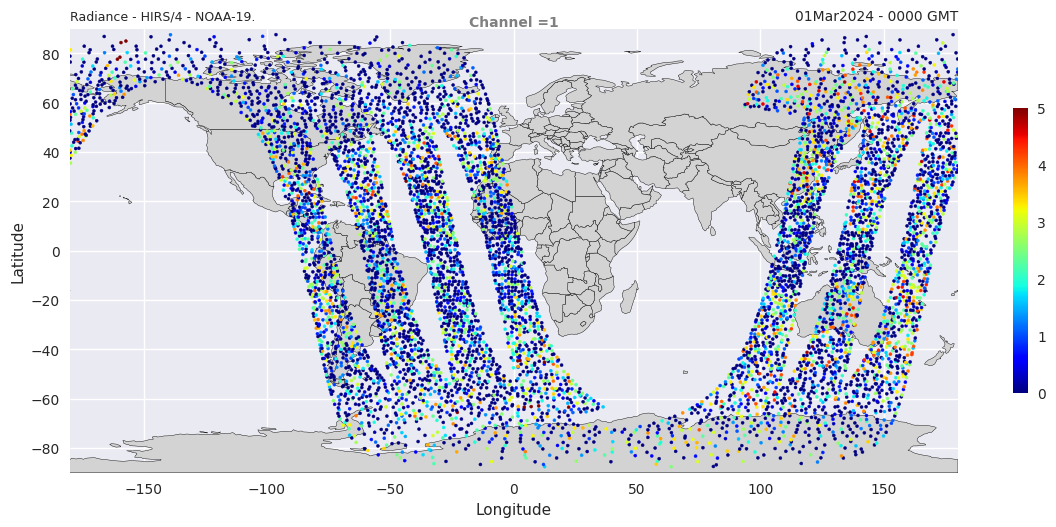

In [16]:
param = 'oma'
minVal = 0.0
maxVal = 5.0
channel = 1

forplot = 'Channel ='+str(channel)
varInfo = getVarInfo(varType, varName, 'instrument')
if varInfo is not None:
    instrument_title = varInfo
else:
    instrument_title = str(varName) + '-' + str(varType) + '  |  ' + 'Unknown instrument'

ax = gd.plot_diag.plot(gdf_list[tidx], 
                  varName=varName, 
                  varType=varType, 
                  param=param, 
                  minVal=minVal, 
                  maxVal=maxVal, 
                  mask="(nchan=="+str(channel)+") & (iuse == -1 & idqc == 0)", 
                  markersize=4.80, 
                  legend='true')

if ax != None:
    datefmt = dates[tidx]
    date = datetime.strptime(str(datefmt), "%Y%m%d%H")
    date_title = str(date.strftime("%d%b%Y - %H%M")) + ' GMT'
    plt.title(date_title, loc='right', fontsize=10)
    plt.title(instrument_title, loc='left', fontsize=9)
    plt.annotate(forplot, xy=(0.45, 1.015), xytext=(0, 0), xycoords='axes fraction', textcoords='offset points', 
                color='gray', fontweight='bold', fontsize='10',horizontalalignment='left', verticalalignment='center')
    
    figname=varName+"_"+str(varType)+"_"+param+"_"+"CH"+str(channel)+"_"+dates[tidx]+"_"+"plot.png"
    plt.tight_layout()
    plt.savefig(figname)

### Histograma

As funções `pcount()` e `vcount()` da classe `plot_diag` também podem ser utilizadas para obter um histograma com a contagem do número de observações para a variável, porém, no caso da **radiância**, como há apenas os dados de uma variável (sensor) e um tipo (satélite) nos arquivos, ambas as funções geram o mesmo histograma com uma única coluna:

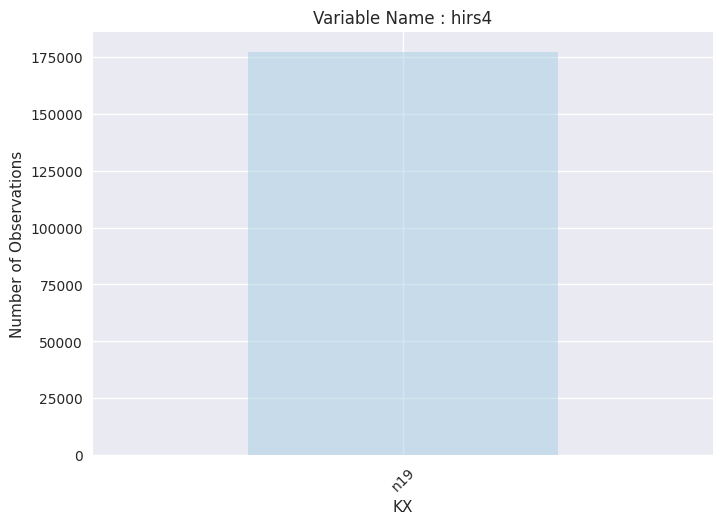

In [17]:
gd.plot_diag.pcount(gdf_list[tidx], varName)

Utilize a função `vcount()` da classe `plot_diag` para obter um histograma com a contagem do número de observações para todos os tipos de variáveis:

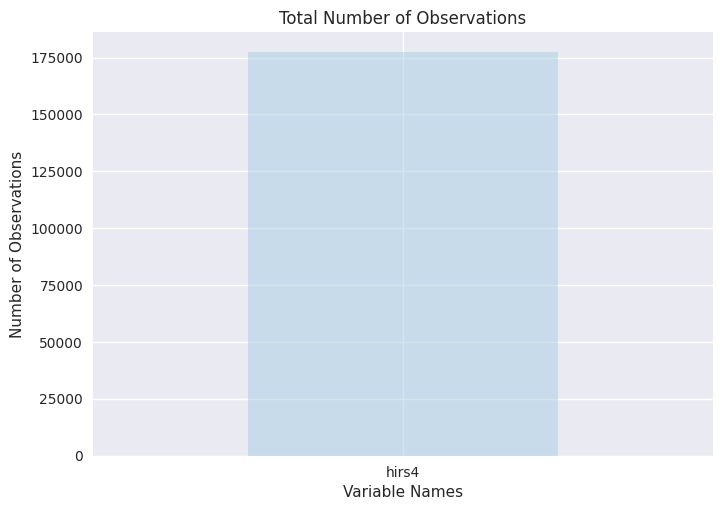

In [18]:
gd.plot_diag.vcount(gdf_list[tidx])

### Série temporal

<a id='time_series'></a>
A seguir são apresentadas as opções de figuras com a função `time_series_radi()` (nova função), incluída na classe `plot_diag`. Inicialmente é gerada uma figura com os parâmetros já fixados nesta seção. Em seguida são apresentadas figuras alterando o parâmetro `channel`.

Plotando uma série temporal do OmA e OmF para os dados do canal setado na célula de definição das variáveis:


 Variable: hirs4  ||  type: n19  ||  Radiance - HIRS/4 - NOAA-19.  ||  check: OmF

 Preparing data for: 2024-03-01:00  - Channel de radiancia:  7
 Preparing data for: 2024-03-01:06  - Channel de radiancia:  7
 Preparing data for: 2024-03-01:12  - Channel de radiancia:  7
 Preparing data for: 2024-03-01:18  - Channel de radiancia:  7
 Preparing data for: 2024-03-02:00  - Channel de radiancia:  7
 Preparing data for: 2024-03-02:06  - Channel de radiancia:  7
 Preparing data for: 2024-03-02:12  - Channel de radiancia:  7
 Preparing data for: 2024-03-02:18  - Channel de radiancia:  7


channels =  [7]
 Calculating for 2024-03-01:00
 Calculating for 2024-03-01:06
 Calculating for 2024-03-01:12
 Calculating for 2024-03-01:18
 Calculating for 2024-03-02:00
 Calculating for 2024-03-02:06
 Calculating for 2024-03-02:12
 Calculating for 2024-03-02:18


 Making Graphics...
 Done!



<Figure size 600x400 with 0 Axes>

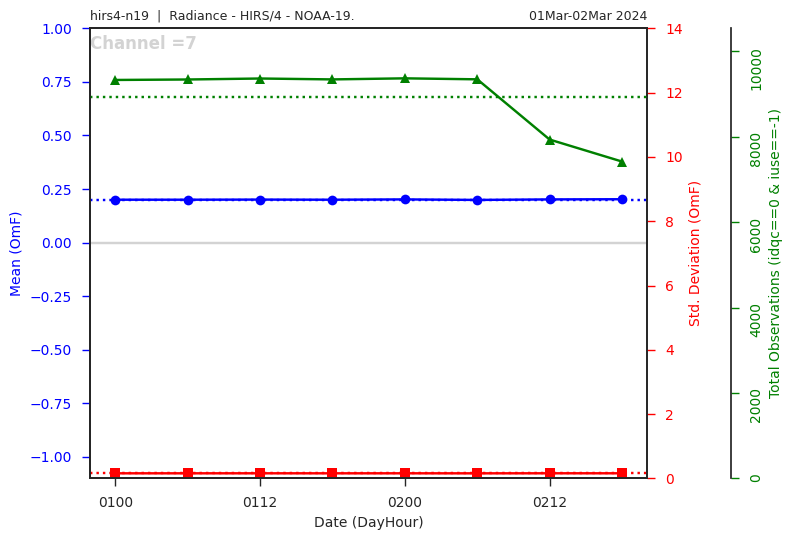

<Figure size 600x400 with 0 Axes>

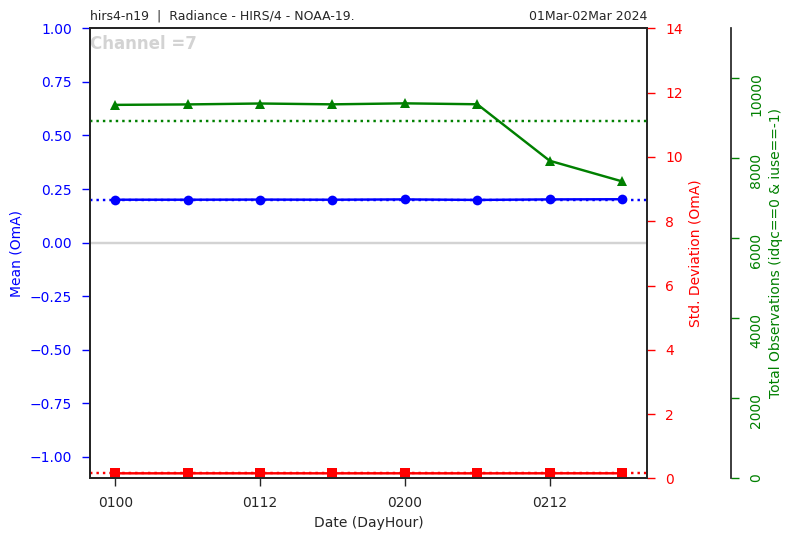

<Figure size 600x400 with 0 Axes>

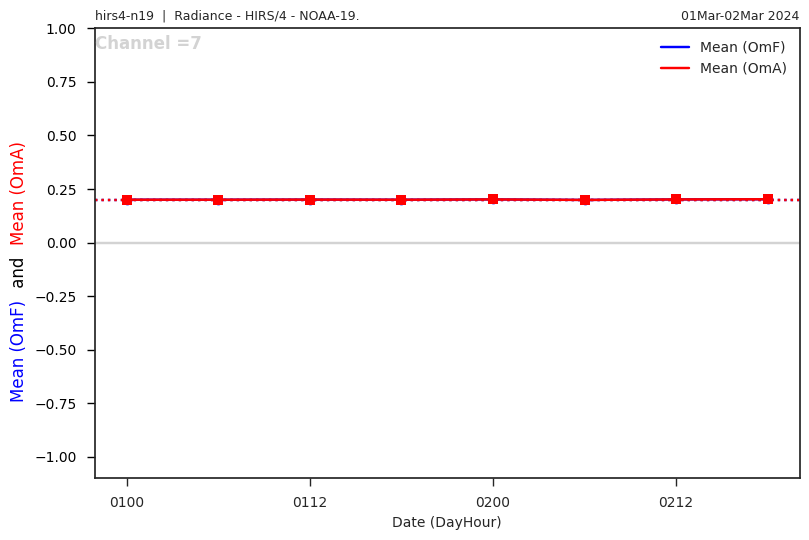

<Figure size 600x400 with 0 Axes>

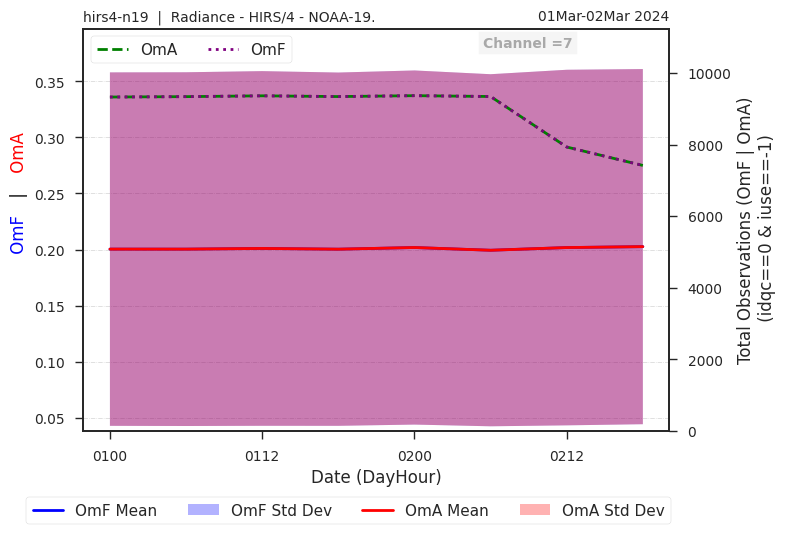

In [32]:
vminOMA = -1.0       
vmaxOMA = 1.0        
vminSTD = 0.0        
vmaxSTD = 14.0
channel = 7

gd.plot_diag.time_series_radi(gdf_list,
                             varName=varName, 
                             varType=varType, 
                             mask='idqc==0 & iuse==-1', 
                             dateIni=dateIni, 
                             dateFin=dateFin, 
                             nHour=nHour, 
                             vminOMA=vminOMA, 
                             vmaxOMA=vmaxOMA, 
                             vminSTD=vminSTD, 
                             vmaxSTD=vmaxSTD, 
                             channel=channel, 
                             Clean=False)

No caso anterior, o parâmetro `channel` estava fixo no canal 6. Os valores de vminOMA, vmaxOMA, vminSTD e vmaxSTD, fixados inicialmente, são alterados para melhorar a visualização da série temporal. 


 Variable: hirs4  ||  type: n19  ||  Radiance - HIRS/4 - NOAA-19.  ||  check: OmF

 Preparing data for: 2024-03-01:00  - Channel de radiancia:  7
 Preparing data for: 2024-03-01:06  - Channel de radiancia:  7
 Preparing data for: 2024-03-01:12  - Channel de radiancia:  7
 Preparing data for: 2024-03-01:18  - Channel de radiancia:  7
 Preparing data for: 2024-03-02:00  - Channel de radiancia:  7
 Preparing data for: 2024-03-02:06  - Channel de radiancia:  7
 Preparing data for: 2024-03-02:12  - Channel de radiancia:  7
 Preparing data for: 2024-03-02:18  - Channel de radiancia:  7


channels =  [7]
 Calculating for 2024-03-01:00
 Calculating for 2024-03-01:06
 Calculating for 2024-03-01:12
 Calculating for 2024-03-01:18
 Calculating for 2024-03-02:00
 Calculating for 2024-03-02:06
 Calculating for 2024-03-02:12
 Calculating for 2024-03-02:18


 Making Graphics...
 Done!



<Figure size 600x400 with 0 Axes>

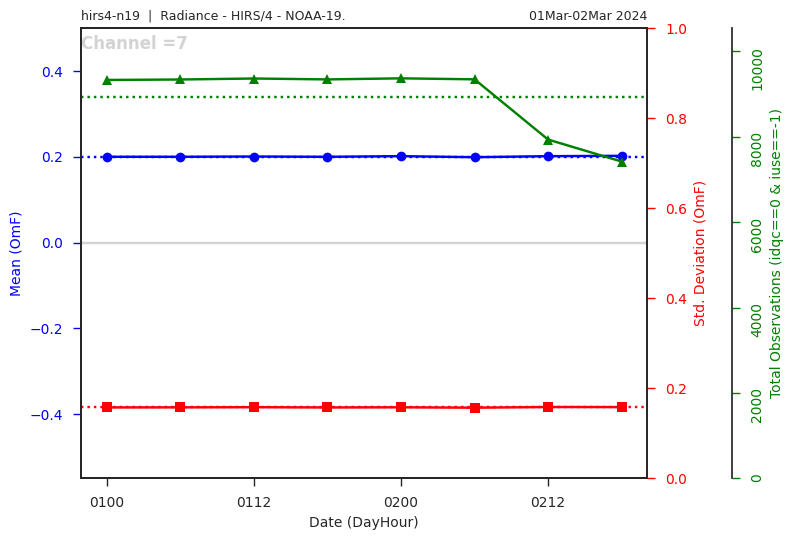

<Figure size 600x400 with 0 Axes>

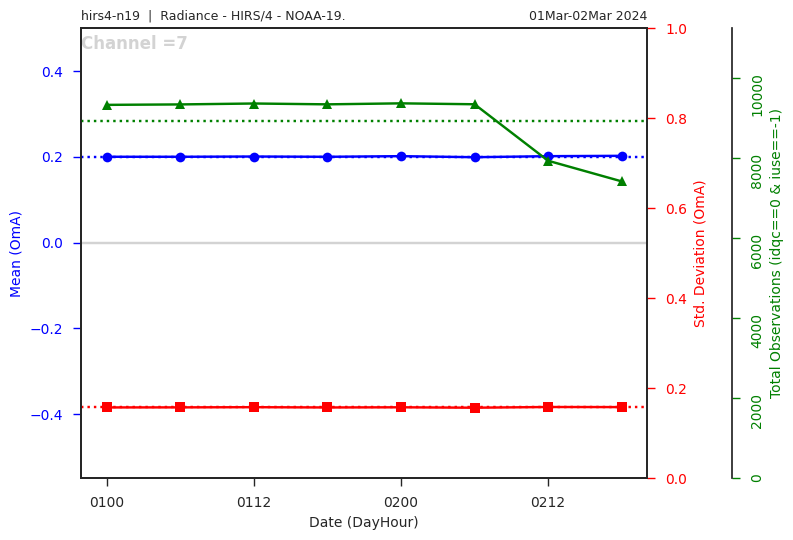

<Figure size 600x400 with 0 Axes>

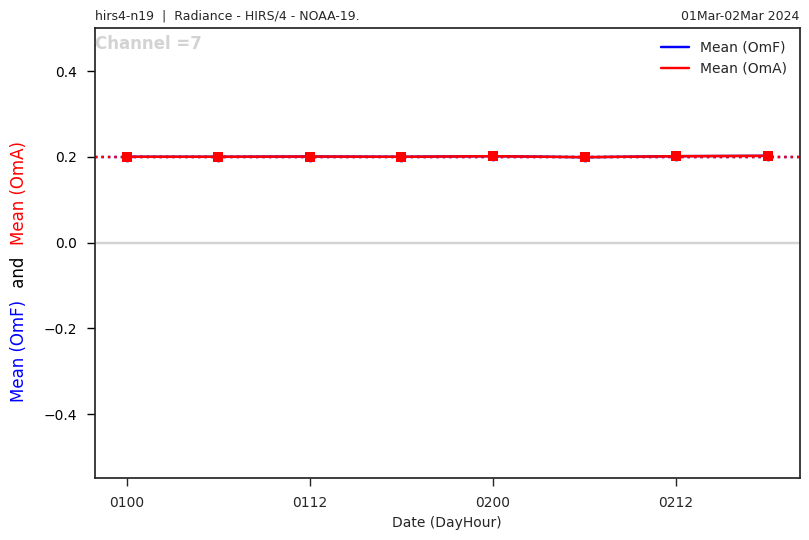

<Figure size 600x400 with 0 Axes>

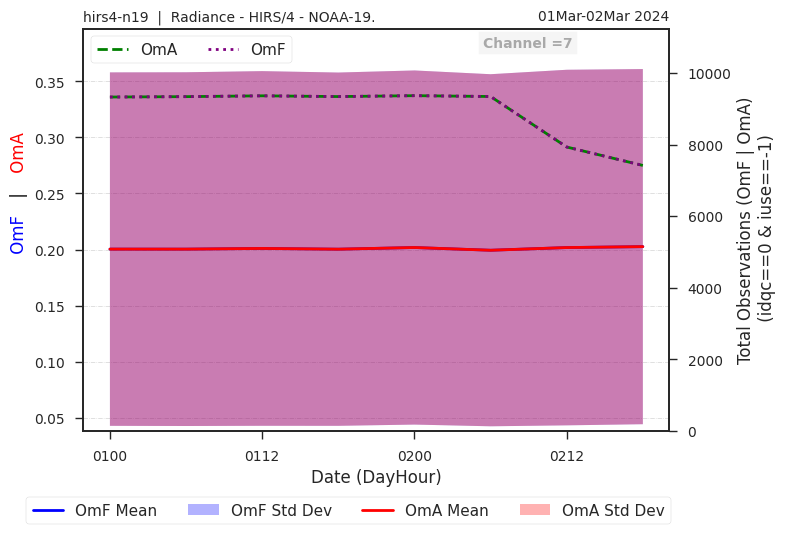

In [33]:
vminOMA = -0.5 
vmaxOMA = 0.5 
vminSTD = 0.0
vmaxSTD = 1.0

gd.plot_diag.time_series_radi(gdf_list,
                             varName=varName, 
                             varType=varType, 
                             mask='idqc==0 & iuse==-1', 
                             dateIni=dateIni, 
                             dateFin=dateFin, 
                             nHour=nHour, 
                             vminOMA=vminOMA, 
                             vmaxOMA=vmaxOMA, 
                             vminSTD=vminSTD, 
                             vmaxSTD=vmaxSTD, 
                             channel=channel, 
                             Clean=False)

Agora, a variável `channel` é alterada para considerar mais de um canal. A opção `channel = None` busca os dados em cada canal existente nos arquivos e faz um diagrama de *Hovmoller* com as médias, desvios padrão e quantidade de dados assimilados em todos os canais (observe que os valores no eixo y (ordenada) identifica todos os canais de 1 à 15). Quando `channel` é uma lista específica de canais, indicada pelo usuário, o diagrama de *Hovmoller* é construído apenas com os canais indicados pelo usuário.

Dessa forma, pode-se utilizar o parâmetro `channels=[6,10,11,12,13,14]` para produzir uma série temporal para mais de um canal:


 Variable: hirs4  ||  type: n19  ||  Radiance - HIRS/4 - NOAA-19.  ||  check: OmF

 Preparing data for: Canais de radiancia2024-03-01:00
 Channels:  [1, 2, 7, 8, 13, 14, 15, 18, 19]

 Preparing data for: Canais de radiancia2024-03-01:06
 Channels:  [1, 2, 7, 8, 13, 14, 15, 18, 19]

 Preparing data for: Canais de radiancia2024-03-01:12
 Channels:  [1, 2, 7, 8, 13, 14, 15, 18, 19]

 Preparing data for: Canais de radiancia2024-03-01:18
 Channels:  [1, 2, 7, 8, 13, 14, 15, 18, 19]

 Preparing data for: Canais de radiancia2024-03-02:00
 Channels:  [1, 2, 7, 8, 13, 14, 15, 18, 19]

 Preparing data for: Canais de radiancia2024-03-02:06
 Channels:  [1, 2, 7, 8, 13, 14, 15, 18, 19]

 Preparing data for: Canais de radiancia2024-03-02:12
 Channels:  [1, 2, 7, 8, 13, 14, 15, 18, 19]

 Preparing data for: Canais de radiancia2024-03-02:18
 Channels:  [1, 2, 7, 8, 13, 14, 15, 18, 19]



channels =  [1, 2, 7, 8, 13, 14, 15, 18, 19]
 Calculating for 2024-03-01:00
 Calculating for 2024-03-01:06
 Calcul

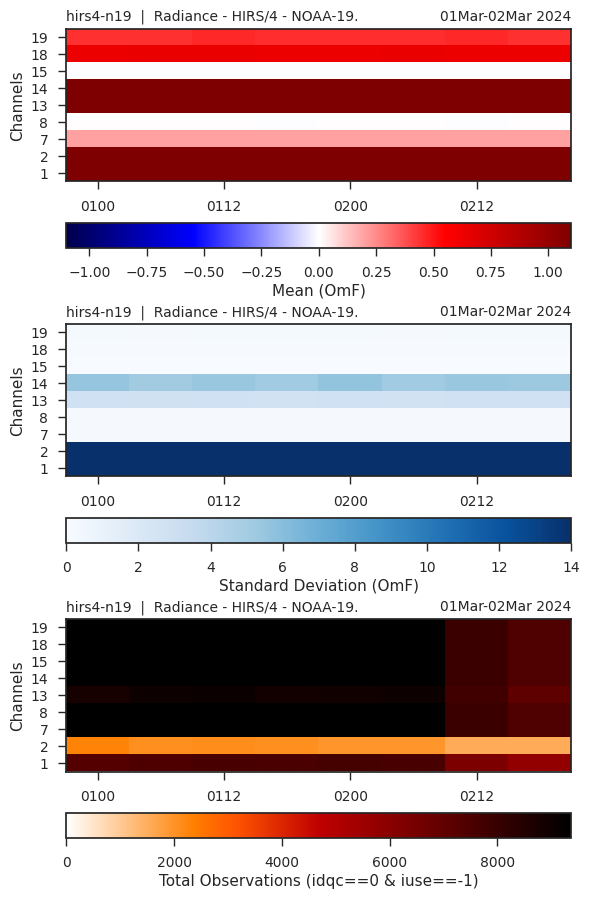

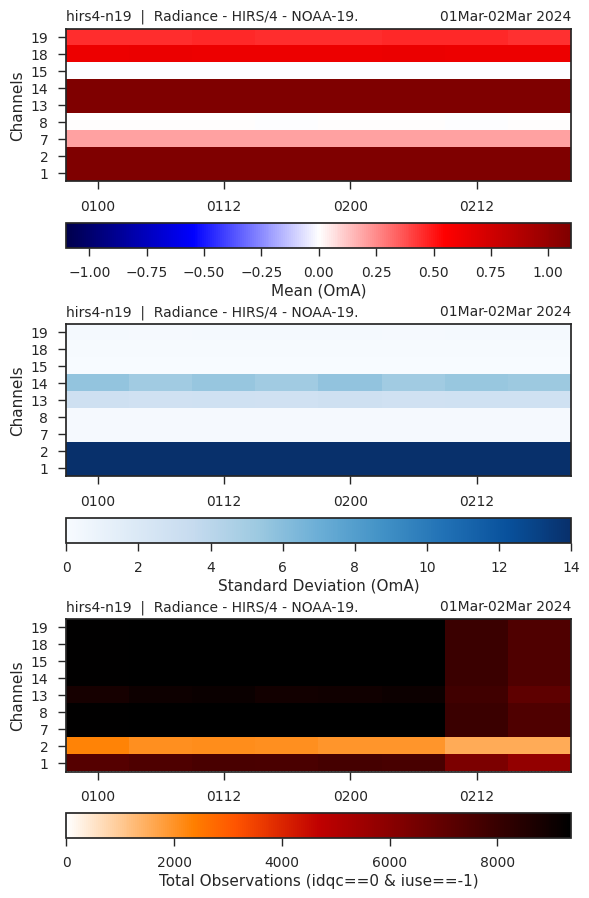

In [23]:
channels = [1, 2, 7, 8, 13, 14, 15, 18, 19]

gd.plot_diag.time_series_radi(gdf_list,
                             varName=varName, 
                             varType=varType, 
                             mask='idqc==0 & iuse==-1', 
                             dateIni=dateIni, 
                             dateFin=dateFin, 
                             nHour=nHour, 
                             vminOMA=vminOMA, 
                             vmaxOMA=vmaxOMA, 
                             vminSTD=vminSTD, 
                             vmaxSTD=vmaxSTD, 
                             channel=channels, 
                             Clean=False)

Considerando todos os canais, ou seja, `channel = None`:


 Variable: hirs4  ||  type: n19  ||  Radiance - HIRS/4 - NOAA-19.  ||  check: OmF

 Preparing data for: Canais de radiancia2024-03-01:00
 Channels:  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

 Preparing data for: Canais de radiancia2024-03-01:06
 Channels:  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

 Preparing data for: Canais de radiancia2024-03-01:12
 Channels:  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

 Preparing data for: Canais de radiancia2024-03-01:18
 Channels:  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

 Preparing data for: Canais de radiancia2024-03-02:00
 Channels:  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

 Preparing data for: Canais de radiancia2024-03-02:06
 Channels:  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

 Preparing data for: Canais de radiancia2024-03-02:12
 Channels:  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 

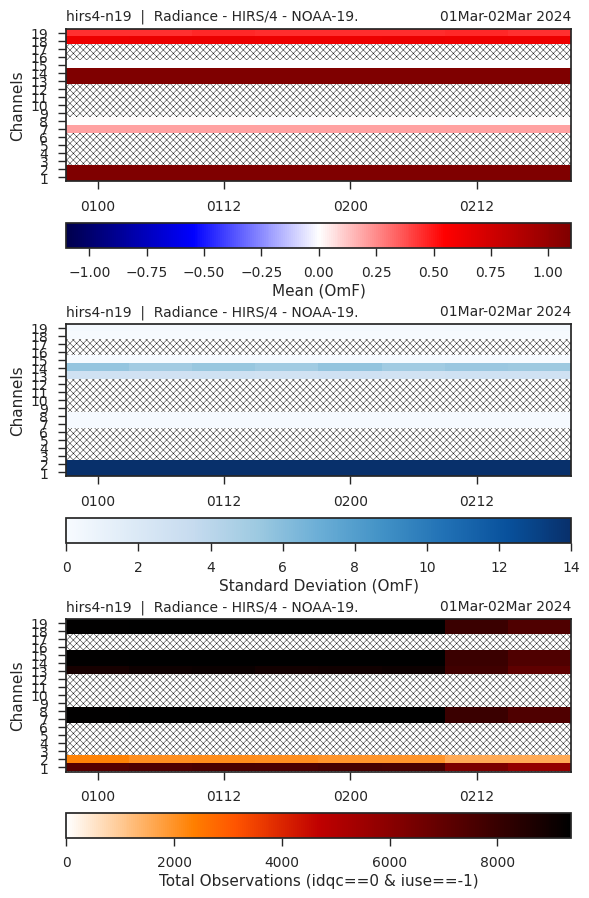

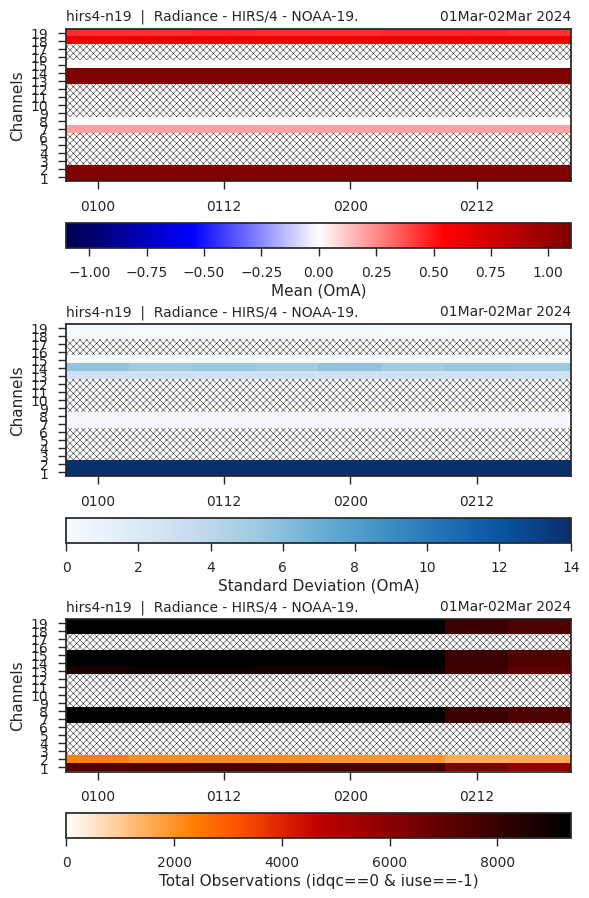

In [24]:
channel = None

gd.plot_diag.time_series_radi(gdf_list,
                             varName=varName, 
                             varType=varType, 
                             mask='idqc==0 & iuse==-1', 
                             dateIni=dateIni, 
                             dateFin=dateFin, 
                             nHour=nHour, 
                             vminOMA=vminOMA, 
                             vmaxOMA=vmaxOMA, 
                             vminSTD=vminSTD, 
                             vmaxSTD=vmaxSTD, 
                             channel=channel, 
                             Clean=False)

### STATCOUNT

A seguir são apresentadas as opções de figuras obtidas pela função `statcount()`. A função `statcount()` fornece dois tipos de figuras: com `figMap=True` é possível gerar uma sequência de imagens com os pontos geográficos das observações assimiladas, rejeitadas e monitoradas em um período de tempo `dateIni` à `dateFin` com intervalo de tempo `nHour`. Uma outra figura contendo uma série temporal da quantidade de dados assimilados, rejeitados e monitorados é gerada se `figTS=True`. Quando os arquivos utilizados são de **radiância**, deve-se atribuir a variável `channel` o número do canal desejado (`channel=6`), enquanto que, se os dados analisados forem convencionais a variável `channel` deve receber `None` (`channel=None`).

Nos dados de **radiância** a classificação dos dados em assimilado, rejeitado e monitorado é realizada considerando dois tipos de observações monitoradas:

1. monitorado-assimilado: observações que são monitoradas, `iuse = -1`, que poderiam ser assimiladas pois `idqc = 0`.
2. monitorado-rejeitado: observações que são monitoradas, `iuse = -1`, que poderiam ser rejeitadas pois `idqc != 0`.

A tabela abaixo detalha como a classificação dos dados de **radiância** é realizada.



|                         |   idqc      |        iuse        |
| :---                    |:---:        | :---               |
| Assimilated             |   == 0      |   >= 1             |
| Monitored-assimilated   |   == 0      |   >= -1 and < 1    |
| Monitored-rejected      |   != 0      |   >= -1 and < 1    |
| Rejected                |   != 0      |   >= 1             |



A seguir um exemplo que gera uma sequência de figuras com a geolocalização dos dados de **radiância** assimilados, rejeitados e monitorados (`figMap=True`) em um intervalo de tempo dentro do período de dados carregado no início do notebook.

channel  1  not assimilated or rejected on the date --> 2024-03-01:00


/home/radiancia/DiagRadi-V2_issue45/gsidiag/__main__.py:94: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  path=gpd.datasets.get_path('naturalearth_lowres')


channel  1  not assimilated or rejected on the date --> 2024-03-01:06


/home/radiancia/DiagRadi-V2_issue45/gsidiag/__main__.py:94: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  path=gpd.datasets.get_path('naturalearth_lowres')


channel  1  not assimilated or rejected on the date --> 2024-03-01:12


/home/radiancia/DiagRadi-V2_issue45/gsidiag/__main__.py:94: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  path=gpd.datasets.get_path('naturalearth_lowres')


channel  1  not assimilated or rejected on the date --> 2024-03-01:18


/home/radiancia/DiagRadi-V2_issue45/gsidiag/__main__.py:94: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  path=gpd.datasets.get_path('naturalearth_lowres')


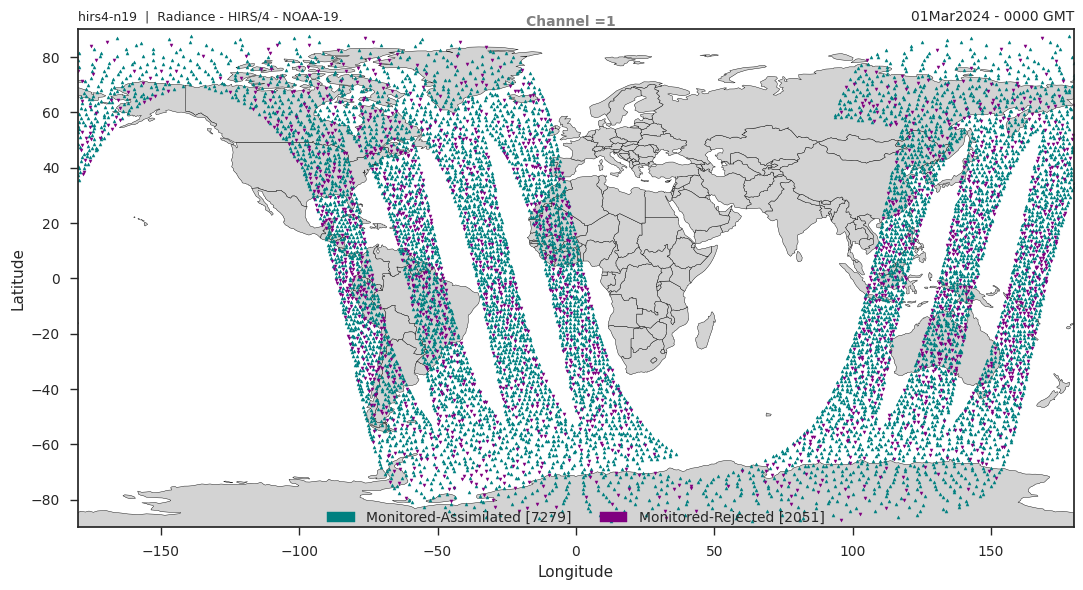

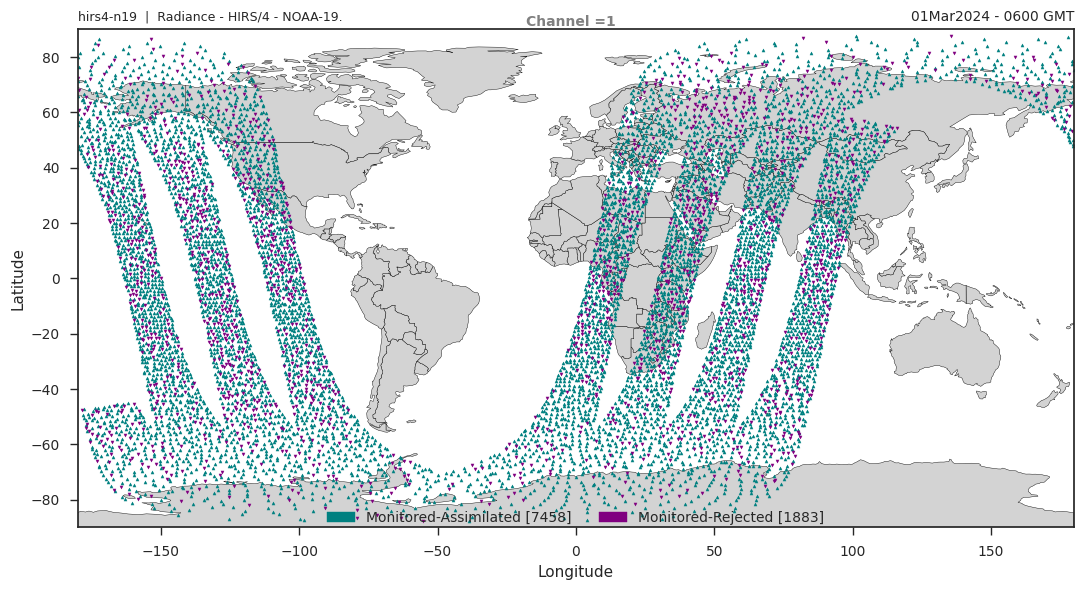

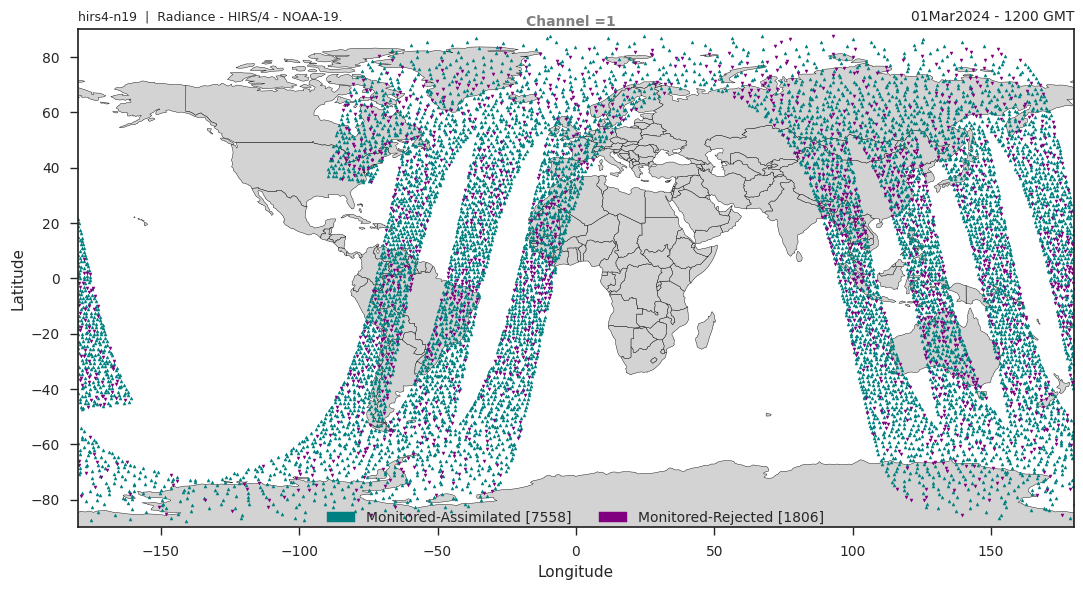

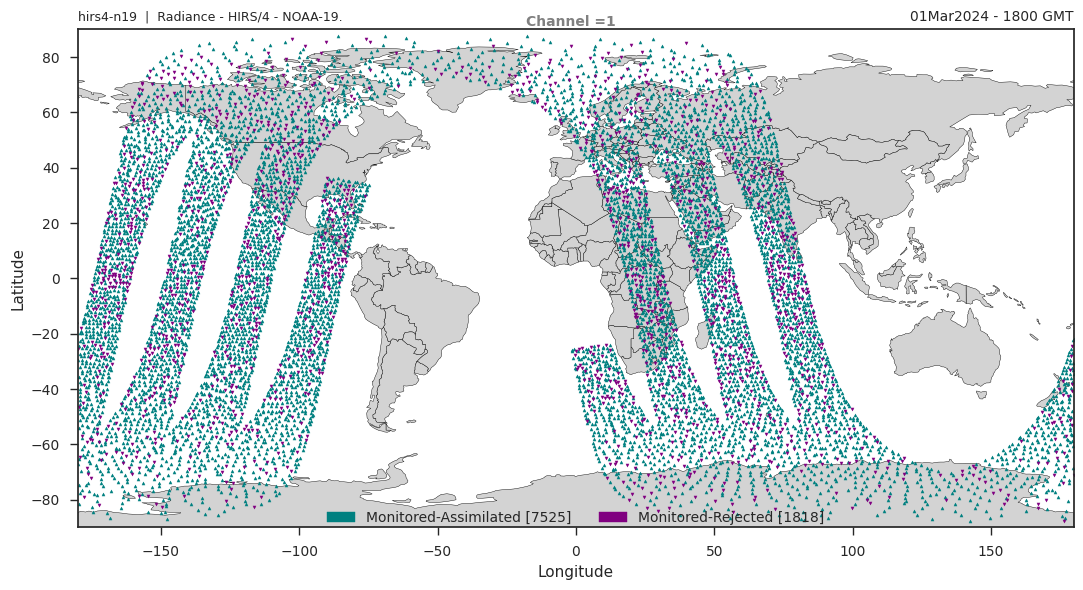

In [25]:
channel = 1
dateIni = '2024030100'
dateFin = '2024030118'

gd.plot_diag.statcount(gdf_list, 
                        varName=varName, 
                        varType=varType, 
                        noiqc=False, 
                        dateIni=dateIni, 
                        dateFin=dateFin, 
                        nHour=nHour, 
                        channel=channel, 
                        figTS=False, 
                        figMap=True, 
                        markersize=4.80)

Observe que no exemplo acima os dados do canal selecionado foram assimilados ou rejeitados. Caso o canal também contenha algum dado monitorado, uma segunda figura seria gerada com a localização destes dados. Abaixo um exemplo de canal do satélite `n19` cujo os dados são monitorados. 

channel  8  not assimilated or rejected on the date --> 2024-03-01:00


/home/radiancia/DiagRadi-V2_issue45/gsidiag/__main__.py:94: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  path=gpd.datasets.get_path('naturalearth_lowres')
/home/radiancia/DiagRadi-V2_issue45/gsidiag/__main__.py:3354: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  ax = df.plot(ax=ax,legend=True, marker=mk, color=cl, **kwargs)


channel  8  not assimilated or rejected on the date --> 2024-03-01:06


/home/radiancia/DiagRadi-V2_issue45/gsidiag/__main__.py:94: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  path=gpd.datasets.get_path('naturalearth_lowres')
/home/radiancia/DiagRadi-V2_issue45/gsidiag/__main__.py:3354: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  ax = df.plot(ax=ax,legend=True, marker=mk, color=cl, **kwargs)


channel  8  not assimilated or rejected on the date --> 2024-03-01:12


/home/radiancia/DiagRadi-V2_issue45/gsidiag/__main__.py:94: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  path=gpd.datasets.get_path('naturalearth_lowres')
/home/radiancia/DiagRadi-V2_issue45/gsidiag/__main__.py:3354: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  ax = df.plot(ax=ax,legend=True, marker=mk, color=cl, **kwargs)


channel  8  not assimilated or rejected on the date --> 2024-03-01:18


/home/radiancia/DiagRadi-V2_issue45/gsidiag/__main__.py:94: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  path=gpd.datasets.get_path('naturalearth_lowres')
/home/radiancia/DiagRadi-V2_issue45/gsidiag/__main__.py:3354: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  ax = df.plot(ax=ax,legend=True, marker=mk, color=cl, **kwargs)


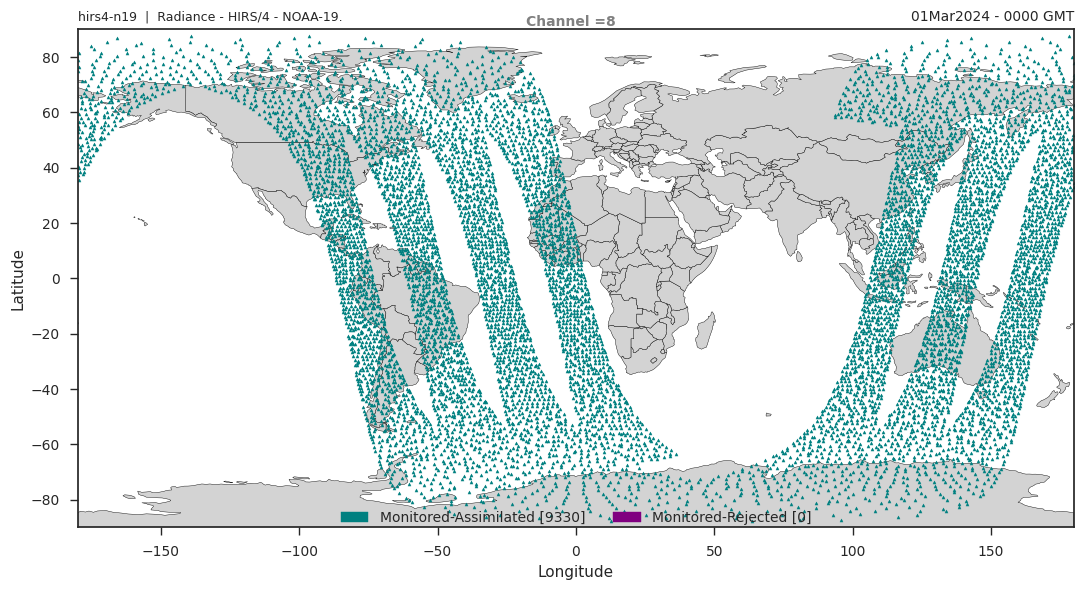

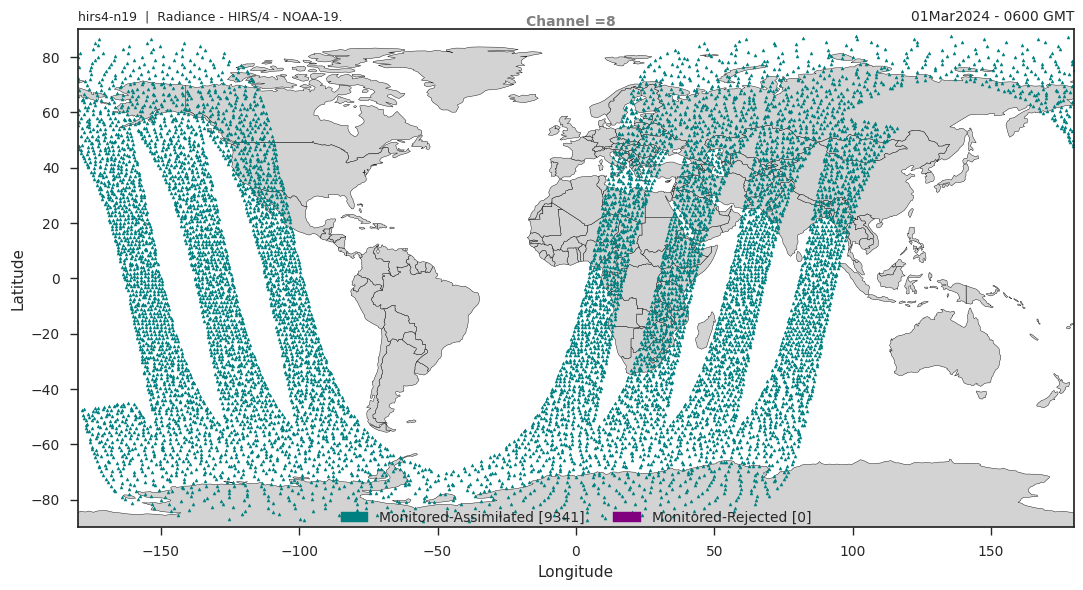

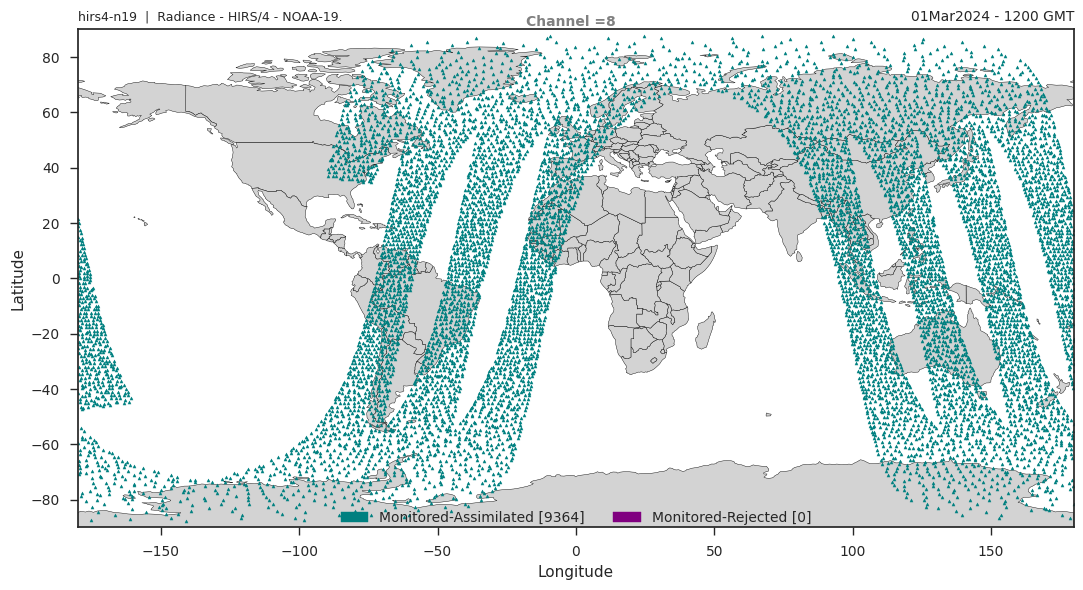

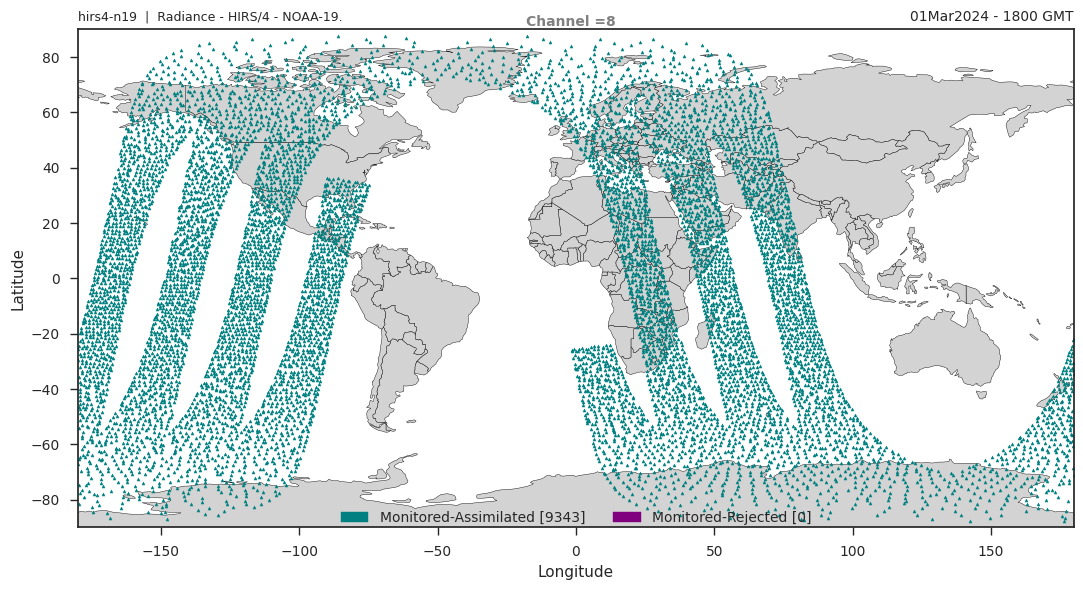

In [26]:
channel = 8
dateIni = '2024030100'
dateFin = '2024030118'

gd.plot_diag.statcount(gdf_list, 
                        varName=varName, 
                        varType=varType, 
                        noiqc=False, 
                        dateIni=dateIni, 
                        dateFin=dateFin, 
                        nHour=nHour, 
                        channel=channel, 
                        figTS=False, 
                        figMap=True, 
                        markersize=4.80)

Quando `figTS=True` apenas uma figura com a série temporal da quantidade de dados assimilados, rejeitados e monitorados é retornada.

<Figure size 600x400 with 0 Axes>

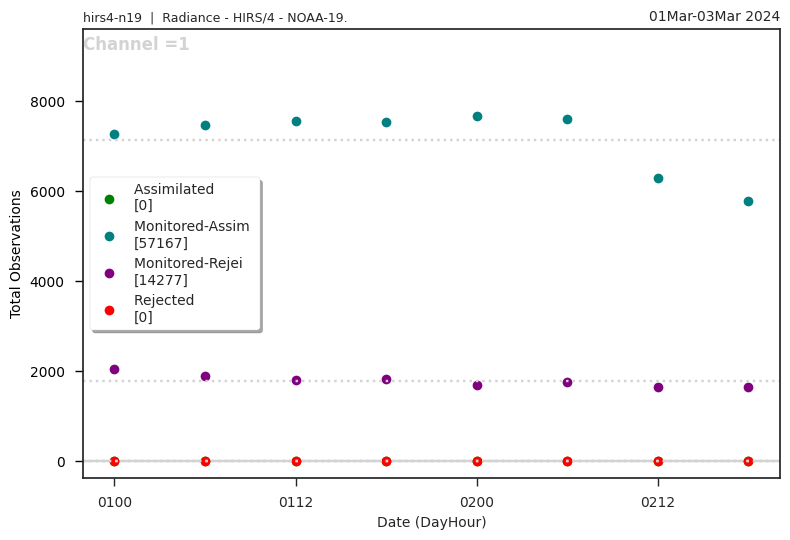

<Figure size 600x400 with 0 Axes>

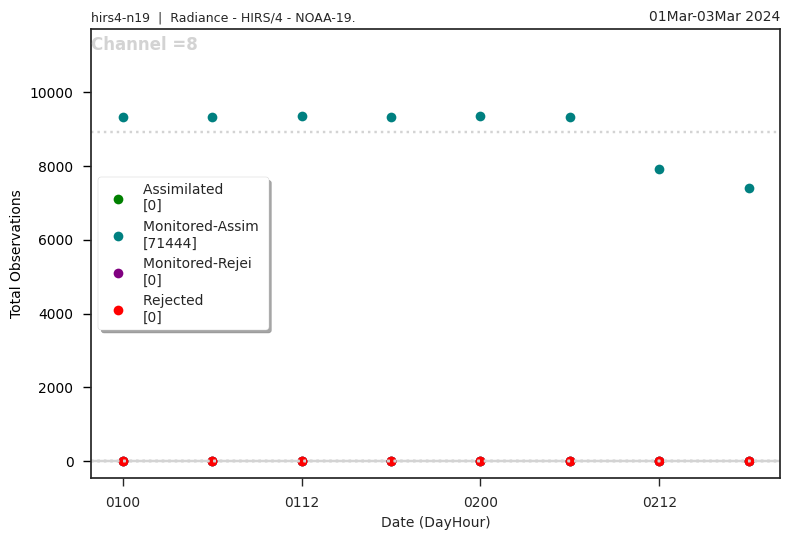

In [27]:
channel = 1
dateIni = '2024030100'
dateFin = '2024030218'

gd.plot_diag.statcount(gdf_list, 
                        varName=varName, 
                        varType=varType, 
                        noiqc=False, 
                        dateIni=dateIni, 
                        dateFin=dateFin, 
                        nHour=nHour, 
                        channel=channel, 
                        figTS=True, 
                        figMap=False, 
                        markersize=4.80)

channel = 8
gd.plot_diag.statcount(gdf_list, 
                        varName=varName, 
                        varType=varType, 
                        noiqc=False, 
                        dateIni=dateIni, 
                        dateFin=dateFin, 
                        nHour=nHour, 
                        channel=channel, 
                        figTS=True, 
                        figMap=False, 
                        markersize=4.80)

Finalizado o uso dos arquivos, feche-os para liberar a memória utilizada:

In [34]:
for file in gdf_list:
    if file._FNumber != None:
            file.close()

O `readDiag` é um pacote em desenvolvimento e em constante atualização. Novas funcionalidades serão adicionadas e demonstradas por meio deste notebook.